# Plot/compute various metrics (confusion matrices, ROC curves, ...)

Using Sara's visualization code.

In [63]:
import os
import pandas as pd
from matplotlib import pyplot
CLASSIFIER_RESULTS_LOC = "output/classifier-results/"
%run "../scripts/cf_matrix.py"

In [96]:
def get_vals(filename):
    mets = pd.read_csv(os.path.join(CLASSIFIER_RESULTS_LOC, filename), sep="\t", index_col=0)
    mvs = mets["Count"]
    tp = mvs["TP"]
    fp = mvs["FP"]
    tn = mvs["TN"]
    fn = mvs["FN"]   
    return tp, fp, tn, fn

## Confusion matrices

codacore-amalgam-data.tsv


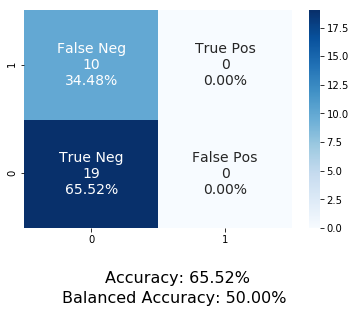

limma-1000ftrs-data.tsv


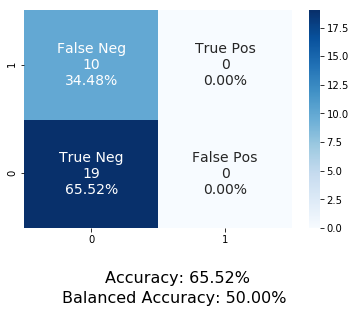

limma-100ftrs-data.tsv


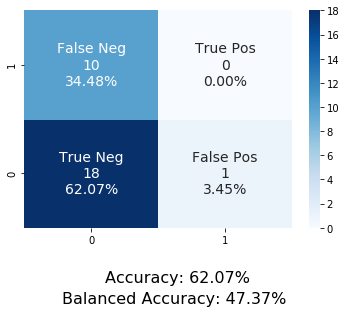

limma-20ftrs-data.tsv


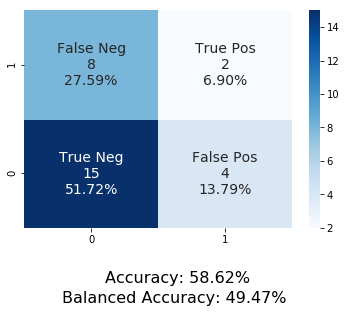

limma-5ftrs-data.tsv


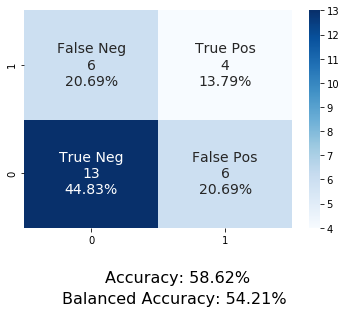

songbird-1000ftrs-data.tsv


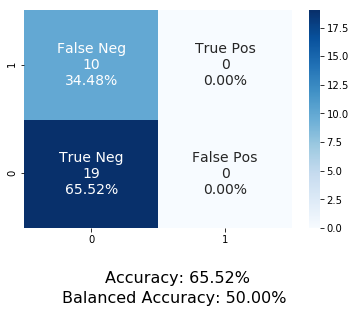

songbird-100ftrs-data.tsv


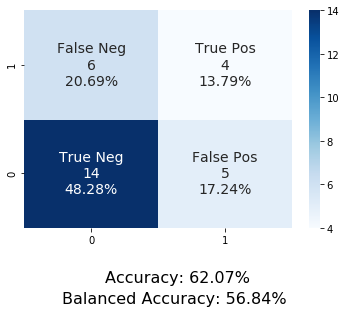

songbird-20ftrs-data.tsv


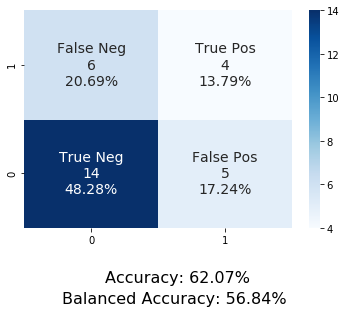

songbird-5ftrs-data.tsv


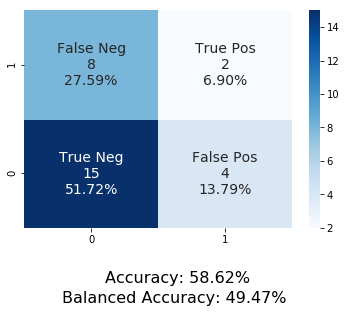

In [97]:
fnames = []
for f in os.scandir(CLASSIFIER_RESULTS_LOC):
    fnames.append(f.name)
    
for filename in sorted(fnames):
    fig, ax = pyplot.subplots(1)
    
    print("=" * 79)
    print(filename)
    
    tp, fp, tn, fn = get_vals(filename)
    
    confusion_matrix(tp, fp, tn, fn, ax)
    
    acc = (tp + tn) / (tp + fp + tn + fn)
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    bacc = (tpr + tnr) / 2
    
    ax.text(0.6, -0.5, f"Accuracy: {100*acc:.2f}%", fontsize=16)
    ax.text(0.28, -0.69, f"Balanced Accuracy: {100*bacc:.2f}%", fontsize=16)
    
    # call show() so that we can easily interlace the print stuff (classifier result file name)
    # with images. from https://stackoverflow.com/a/43067920.
    # You could argue we should instead just use this text as the figure titles, but that might
    # be out of place since we'll be shrinking these images down a lot? idk.
    pyplot.show()

## ROC Curve Plots

We could try to extract the threshold information from the logistic regression classifiers being used for the differential abundance/expression log-ratio stuff, or from CoDaCoRe, but it's late, I'm tired, and it's easiest to just show them as points in an ROC plot.

In [129]:
def diff_abund_rocplot(toolname):

    fig, ax = pyplot.subplots(1)

    sfnames = [filename for filename in fnames if filename.startswith(toolname.lower())]
    ssfnames = sorted(sfnames, key=lambda filename: int(filename.split("-")[1][:-4]))

    for filename in ssfnames:
        tp, fp, tn, fn = get_vals(filename)

        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)

        num_features = int(filename.split("-")[1][:-4])
        ax.scatter(fpr, tpr, label=f"{num_features:,} features per side", s=100)

    # Style ROC curve. Based on code from Sara.
    # Also see https://stackoverflow.com/a/38467407.
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"{toolname} ROC Points")

    ax.legend()

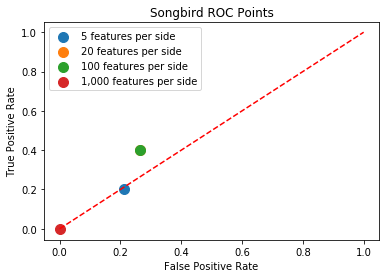

In [130]:
diff_abund_rocplot("Songbird")

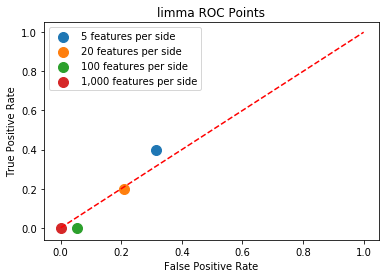

In [131]:
diff_abund_rocplot("limma")